In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    diff,
    nsolve
)
from sympy.core.numbers import NegativeOne, One, Zero
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D
from acchamiltoniansandmatrices.Utils.Plotting import multi_countour_plot

In [6]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

# accHamiltoniansAndMatrices: Lattice Symmetry Breaking (generic)

**M. Arlandoo, J. Frank, T. Mertens**

# Overview

- general
- Symmetry
- Symmetry Breaking

# Generic Symmetry Breaking in an Accelerator Lattice

# General 

We  start by considering the following lattice:
$$A-B-C$$
where A,B and C are generic Hamiltonian operators for lattice elements, **or effective Hamiltonian operators for sublattices**, and we consider the beam coming from the left (this important for the ordering of the operators).

The corresponding Lie map is given by:
$$e^{A(q^0_i,p^0_i)}e^{B(q^1_i,p^1_i)}e^{C(q^2_i,p^2_i)}$$
and after the correct coordinate transformations this becomes:
$$e^{C(q^0_i,p^0_i)}e^{B(q^0_i,p^0_i)}e^{A(q^0_i,p^0_i)}$$

The operators A,B and C in the exponents need to be combined using the BCH formula. Doing this order by order, where with order we mean the number of iterative Poisson brackets and not the order of the resulting polynomial in the independent coordinates, we get:
$$H_0 = A +B + C$$

For the higher orders we go step by step. Let us start by first having a look at $H_1$ for the first three elements.
$$H_1 = A + B + C + \frac{\lbrace \frac{\lbrace A,B \rbrace }{2} + A + B,C \rbrace }{2} + \frac{\lbrace A,B \rbrace }{2}$$


# Symmetry

One can immediately see the effect of the BCH formula, making things very complicated very quickly. 

An interesting question to ask is what happens if $C=A$.

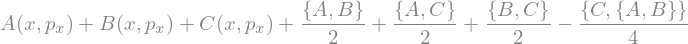

In [7]:
# without symmetry
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True)

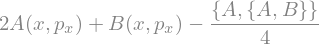

In [8]:
# with symmetry
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True).subs(C,A)

**The terms with a single Poisson bracket have been canceled out!**

Let us now break the symmetry lightly and assume that $C = A + \delta A$.

# Explicit Symmetry Breaking

In [7]:
da = Function("\delta A", commutative=False)(x,px)
da

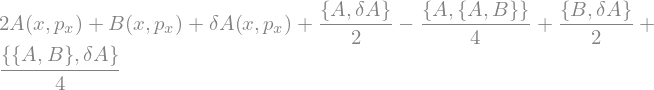

In [10]:
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True).subs(C,A+da).expand(commutator=True)

Slightly breaking the symmetry between the elements $A$ and $C$ immediately introduces new terms
in the Hamiltonian:
$$2 A{\left(x,p_{x} \right)} + B{\left(x,p_{x} \right)} + \delta A{\left(x,p_{x} \right)} + 
\underbrace{\color{blue}{\frac{\lbrace A,\delta A \rbrace }{2}}}_{\color{red}{\text{SB1}}} 
- \frac{\lbrace A,\lbrace A,B \rbrace  \rbrace }{4} 
+ \underbrace{\color{blue}{\frac{\lbrace B,\delta A \rbrace }{2}}}_{\color{red}{\text{SB2}}}  + 
\underbrace{\color{gray}{\frac{\lbrace \lbrace A,B \rbrace ,\delta A \rbrace }{4}}}_{\color{red}{\text{SB3}}} $$
where SB stands for Symmetry Breaking. Note that these terms are directly proportional to the amount of symmetry breaking. 

# Resonance vs non-resonance contributions

In [7]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)
Dop = LieOperator(D,x,px)
Eop = LieOperator(E,x,px)

In [8]:
# Define constant number symbols in sympy - otherwise they are considered variables
LQF   = SymbolTrick("L_{QF}")
LQD   = SymbolTrick("L_{QD}")
LD    = SymbolTrick("L_D")
KQF   = SymbolTrick("K_{QF}")
KQD   = SymbolTrick("K_{QD}")

rep = list(zip(
    [
        LD,
        LQF,
        LQD,
        KQF,
        KQD,
        delta
    ],
    [
        3.5805,
        0.342,
        0.668,
        0.49,
        -0.4999,
        1.5e-3
    ]
)
          )


In [104]:
hamd  = NegativeOne() * HamDrift6D(beta0, gamma0, LD,x,px,y,py,delta).subs(beta0*gamma0,oo).subs(beta0,1).subs(delta,Zero())
hamqf = NegativeOne() * Rational(1,2) * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,Zero())
hamqd = NegativeOne() * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQD,x,px,y,py,delta,KQD).subs(delta,Zero())

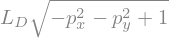

In [105]:
hamd

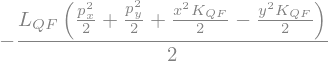

In [106]:
hamqf

In [114]:
o = 3
ham1     = Aop.BCH(Bop,o).BCH(Cop,o).BCH(Dop,o).BCH(Eop,o).ham
fodoham1 = ham1.subs(A,hamqf).subs(B,hamd).subs(C,hamqd).subs(D,hamd).subs(E,hamqf).doit()

In [108]:
fodoham1.free_symbols

In [115]:
fodoham1fdx = lambdify((x,px), diff(fodoham1.subs(py,0).subs(y,0).subs(rep),x),"numpy")
fodoham1fdpx = lambdify((x,px), diff(fodoham1.subs(py,0).subs(y,0).subs(rep),px),"numpy")

In [ ]:
nsolve(
    (diff(fodoham1.subs(py,0).subs(y,0).subs(rep),x),diff(fodoham1.subs(py,0).subs(y,0).subs(rep),px)),
    (x,px),
    (0.5,0.8)
)

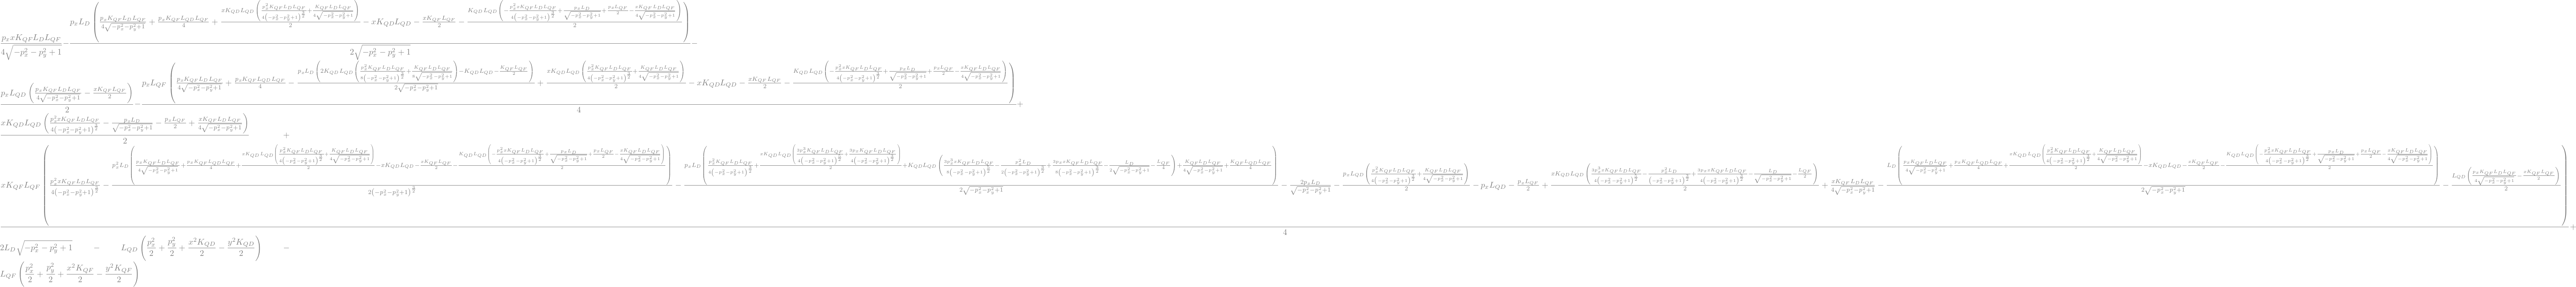

In [112]:
fodoham1

In [ ]:
fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')

multi_countour_plot(
    [fodoham1num], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=3,
    prange=.8,
)

In [54]:
from scipy.optimize import fsolve

fsolve(fodoham1fdx(x,px),(.2,.2))

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

In [40]:
2*np.pi/3

<IPython.core.display.Javascript object>


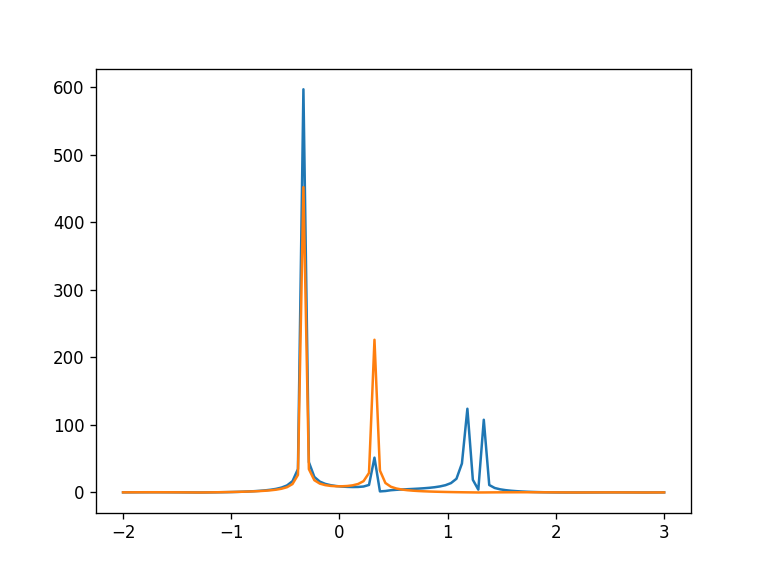

In [109]:
nu0 = 0.33
n = 4

s = .33
def res(j):
    return abs(np.cos(0.33**2-j**2)/(0.33**2-j**2))

def f(j):
    return res(j) * abs((1 + np.cos( (s+jupf1-j) * (s-jufp2+j) )  /  ((s+jupf1-j) * (s-jufp2+j) )))

# def f(j):
#     A = s -(jufp2-jupf1)*j
#     B = s +(jufp2-jupf1)*j
    
    
#     return res(j) * abs(1 + np.cos( A*B)  /  ( A*B))


XX = np.linspace(-2,3,100)
plt.plot(XX, f(XX))
plt.plot(XX, res(XX))

In [13]:
fixedpoints2D(fodoham1,x,px)

TypeError: 'float' object is not callable

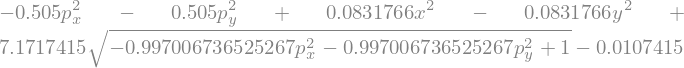

In [19]:
fodoham1num = fodoham1.subs(rep)
fodoham1num

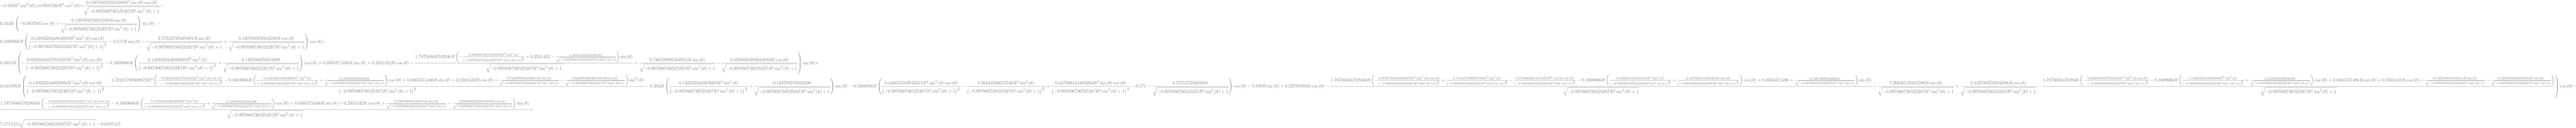

In [43]:
R, theta = symbols("R theta", real=True, positive=True)

xpolar = list(
    zip(
        [x, px, y, py, delta],
        [R*cos(theta),R*sin(theta),0,0,0]
    )
)
xpolarfodoham1 = fodoham1num.subs(xpolar)
xpolarfodoham1

In [45]:
simplify(xpolarfodoham1.subs(theta,3*np.pi/4) - xpolarfodoham1.subs(theta,np.pi/4))

KeyboardInterrupt: 

In [44]:
solve(simplify(xpolarfodoham1.subs(theta,3*np.pi/4) - xpolarfodoham1.subs(theta,np.pi/4)))

KeyboardInterrupt: 

In [29]:
from scipy.optimize import fsolve

In [33]:
simplify(xpolarfodoham1.subs(theta,np.pi/4) - xpolarfodoham1.subs(theta,0))

In [30]:
fsolve(,1)

TypeError: 'Add' object is not callable

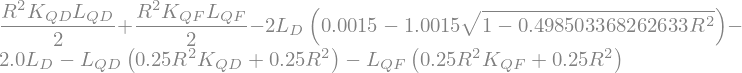

In [48]:
fodoham1.subs(rep).subs(xpolar).subs(theta,np.pi/4) - fodoham1.subs(rep).subs(xpolar).subs(theta,0)

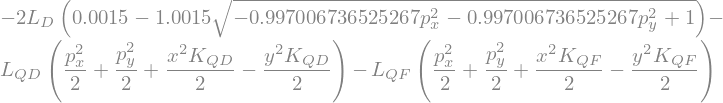

In [49]:
fodoham1.subs(rep)

<IPython.core.display.Javascript object>


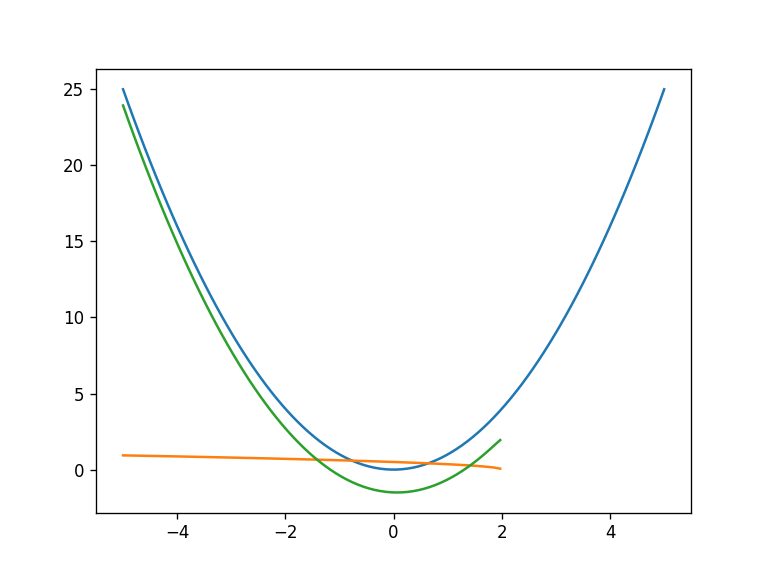

/home/mti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [40]:
XX = np.linspace(-5,5,100)
plt.plot(XX,XX**2)
plt.plot(XX, .5*np.sqrt(1-0.5*XX))
plt.plot(XX,XX**2+.5*np.sqrt(1-0.5*XX)-2)
